In [ ]:
!pip install pulp

!sudo apt-get install coinor-cbc glpk-utils coinor-clp

In [ ]:
import pulp

print(pulp.__version__)

2.3.1


In [ ]:
pulp.pulpTestAll()

In [ ]:
from pulp import *
import pandas as pd

Obliczyć minimalną moc rozpraszaną na rezystorach, czyli całym mostku. Dane do zadania:

|i|1|2|3|4|5||
|--|--|--|--|--|--|--|
|Ui|6|10|4|7|3|V|
|Ii|4|2|2|2|4|mA|
|/\i|1|1|1|1|1|mA|

Ii - /\i <= Ii <=Ii + /\i


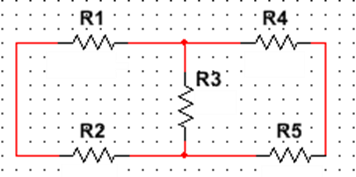

In [ ]:
prob = LpProblem("Najmniejsza moc rozpraszana na rezystorach ", LpMinimize)
u=[6, 10, 4, 7, 3];
i=[4, 2, 2, 2, 4];


i0 = LpVariable("i1", 0)
i1 = LpVariable("i2", 0)
i2 = LpVariable("i3", 0)
i3 = LpVariable("i4", 0)
i4 = LpVariable("i5", 0)

prob +=  i0*u[0]+i1*u[1]+i2*u[2]+i3*u[3]+i4*u[4]
prob += i3+i2 == i0, "kirchoff_i1"
prob += -i2+i0 == i3, "kirchoff_i4"
prob += -i3+i0 == i2, "kirchoff_i3"
prob += -i2+i4 == i1, "kirchoff_i2"
prob += i1+i2 == i4, "kirchoff_i5"
prob += i0 >= 3, "ograniczenie dolne i1"
prob += i0 <= 5, "ograniczenie gorne i1"
prob += i1 >= 1, "ograniczenie dolne i2"
prob += i1 <= 3, "ograniczenie gorne i2"
prob += i2 >= 1,"ograniczenie dolne i3"
prob += i2 <= 3, "ograniczenie gorne i3"
prob += i3 >= 1,"ograniczenie dolne i4"
prob += i3 <= 3, "ograniczenie gorne i4"
prob += i4 >= 3,"ograniczenie dolne i5"
prob += i4 <= 5, "ograniczenie gorne i5"

prob.solve()
# The status of the solution is printed to the screen
print("Status:", LpStatus[prob.status])
# Each of the variables is printed with it's resolved optimum value
for v in prob.variables():
    print(v.name, "=", v.varValue)
print("Najmniejsza moc wydzielona przez rezystory na mostku to {} Wat ".format(value(prob.objective)))

#print("Minimalna moc mostka to {} Wat ".format(min_moc))

Status: Optimal
i1 = 3.0
i2 = 1.0
i3 = 2.0
i4 = 1.0
i5 = 3.0
Najmniejsza moc wydzielona przez rezystory na mostku to 52.0 Wat 


/usr/local/lib/python3.6/dist-packages/pulp/pulp.py:1198: UserWarning: Spaces are not permitted in the name. Converted to '_'
  warnings.warn("Spaces are not permitted in the name. Converted to '_'")




Obliczyć maksymalny prąd płynący przez układ, gdzie prądy wynoszą

|I1|I2|I3|I4|I5|
|--|--|--|--|--|
|2|3|4|2|2|

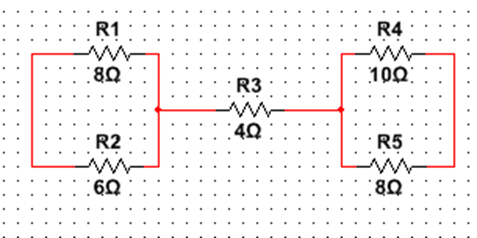

In [ ]:
prob = LpProblem("Maksymalny prąd płynący przez układ ", LpMaximize)

#constant data
r=[8, 6, 4, 10,8];


min_moc = LpVariable("Minimalna moc", 0)
i0 = LpVariable("i1", 0)
i1 = LpVariable("i2", 0)
i2 = LpVariable("i3", 0)
i3 = LpVariable("i4", 0)
i4 = LpVariable("i5", 0)


prob +=  i0+i1
#prob += (u[0]+u[3])*(i0*i1)== min_moc,  "wzór na minimalną moc mostka"
#prob += u[2]-u[3]-u[4]==0,
prob += i2-i1 == i0, "kirchoff_i1"
prob += i0+i1 == i2, "kirchoff_i4"
prob += -i0+i2== i1, "kirchoff_i3"
prob += i2-i4 == i3, "kirchoff_i2"
prob += i2-i3 == i4, "kirchoff_i5"
prob += i0*r[0] - i1*r[1] == 0, "rownanie mocy 1"
prob += i3*r[3] - i4*r[4] == 0, "rownanie mocy 2"
#limitations
prob += i0 <= 2, "ograniczenie gorne i1"
prob += i1 <= 3, "ograniczenie gorne i2"
prob += i2 <= 4, "ograniczenie gorne i3"
prob += i3 <= 2, "ograniczenie gorne i4"
prob += i4 <= 2, "ograniczenie gorne i5"


prob.solve()
# The status of the solution is printed to the screen
print("Status:", LpStatus[prob.status])
# Each of the variables is printed with it's resolved optimum value
for v in prob.variables():
    print(v.name, "=", v.varValue)
print("Największy prąd który może przepłynąć przez układ to {} Ampery ".format(value(prob.objective)))

Status: Optimal
i1 = 1.5428571
i2 = 2.0571429
i3 = 3.6
i4 = 1.6
i5 = 2.0
Największy prąd który może przepłynąć przez układ to 3.6 Ampery 


/usr/local/lib/python3.6/dist-packages/pulp/pulp.py:1198: UserWarning: Spaces are not permitted in the name. Converted to '_'
  warnings.warn("Spaces are not permitted in the name. Converted to '_'")
